<a href="https://colab.research.google.com/github/ThuraAung1601/BHDD-using-streamlit/blob/main/BurmeseHandwrittenDigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BHDD Dataset Preprocessing
- Dataset Link : https://github.com/baseresearch/BHDD
( Download raw file directly and upload to your drive for further uses )

In [ ]:
!pip install pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Data Loading

In [ ]:
import pickle
import numpy as np

#url_path : Path of dataset in your drive
url_path = "/content/gdrive/MyDrive/data.pkl"

dataset = []

with open(url_path,"rb") as file:
    dataset = pickle.load(file)

trainDataset = dataset["trainDataset"]
testDataset = dataset["testDataset"]

print("Train Size: {} Test Size: {}".format(len(trainDataset), len(testDataset)))


Train Size: 60000 Test Size: 27561


In [ ]:
import urllib.request
import gzip
import pickle
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


%matplotlib inline

In [ ]:
numberOfClass = 10

trainX = [list(td["image"] / 255) for td in trainDataset]
trainY = np.eye(numberOfClass)[np.array([td["label"] for td in trainDataset]).reshape(-1)].tolist() #One-hot encode training labels
testX = [list(td["image"] / 255) for td in testDataset]
testY = np.eye(numberOfClass)[np.array([td["label"] for td in testDataset]).reshape(-1)].tolist() #One-hot encode test labels

In [ ]:
print("TrainImageShape:" + str(np.shape(trainX)),
     "TrainLabelShape:" + str(np.shape(trainY)),
     "TestImageShape:" + str(np.shape(testX)),
     "TestLabelShape:" + str(np.shape(testY)))

TrainImageShape:(60000, 28, 28) TrainLabelShape:(60000, 10) TestImageShape:(27561, 28, 28) TestLabelShape:(27561, 10)


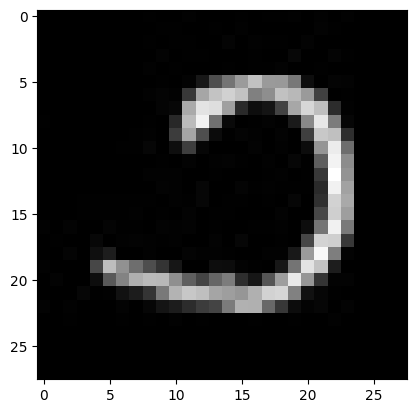

In [ ]:
plt.imshow(trainX[6],cmap='gray')

# Deep Learning Algorithms
- Perceptron
- MLP
- ConvNet

## Visualize the Dataset

In [ ]:
import matplotlib.pyplot as plt
%pylab inline

def show_images(x, y, title_str):
    for c in range(1, 10):
        subplot(3, 3, c)
        i = randint(len(x))
        im = np.reshape(x[i], (28,28))
        axis("off")
        label = np.argmax(y[i])
        title("{} = {}".format(title_str, label))
        imshow(im, cmap='Greys')

Populating the interactive namespace from numpy and matplotlib


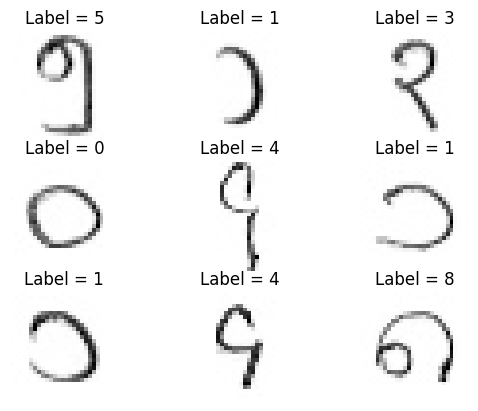

In [ ]:
### Display Training set

show_images(trainX, trainY, 'Label')

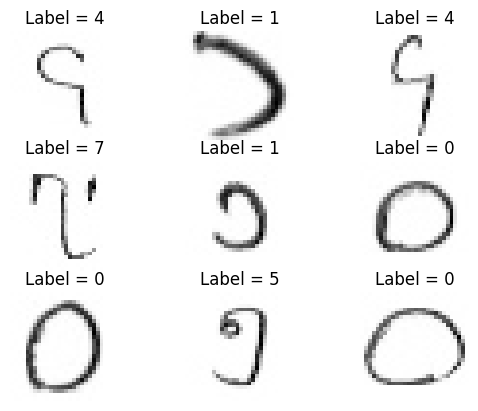

In [ ]:
### Display Test set

show_images(testX, testY, 'Label')

## Perceptron

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Scale images to the [0, 1] range
trainX = np.array(trainX)
testX = np.array(testX)

#Normalize
trainX = trainX.astype("float32") / 255
testX = testX.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

print("x_train shape:", trainX.shape)
print(trainX.shape[0], "train samples")
print(testX.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
27561 test samples


In [ ]:
trainY = np.array(trainY)
testY = np.array(testY)

print("Y_train shape:", trainY.shape)
print(trainY.shape[0], "train samples")
print(testY.shape[0], "test samples")

Y_train shape: (60000, 10)
60000 train samples
27561 test samples


In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy",keras.metrics.Precision(),keras.metrics.Recall()])

history = model.fit(trainX, trainY, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 2.2765 - accuracy: 0.5471 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.2507 - val_accuracy: 0.7757 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 2.2245 - accuracy: 0.8044 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.1999 - val_accuracy: 0.8392 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 2.1739 - accuracy: 0.8419 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.1504 - val_accuracy: 0.8362 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 2.1245 - accuracy: 0.8379 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.1022 - val_accuracy: 0.8330 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/15
422/422 [====================

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


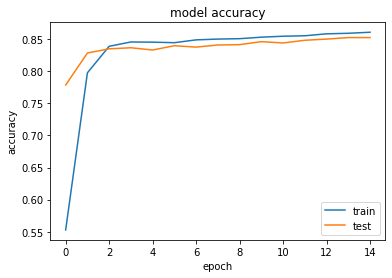

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='lower right')
plt.show()

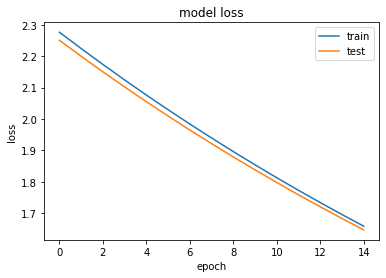

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper right')
plt.show()

In [ ]:
score = model.evaluate(testX, testY, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.629731297492981
Test accuracy: 0.8492435216903687


In [ ]:
loss, accuracy, precision, recall = model.evaluate(testX, testY, verbose=0)
print('Loss', loss)
print('Accuracy', accuracy)
print('Precision', precision)
print('Recall', recall)

f1_score = (2* recall*precision)/(recall+precision)
print("f1_score", f1_score)

Loss 1.629731297492981
Accuracy 0.8492435216903687
Precision 1.0
Recall 0.0009070788510143757
f1_score 0.0018125136092666098


## Multilayer Perceptron

In [ ]:
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                50240     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Scale images to the [0, 1] range
trainX = np.array(trainX)
testX = np.array(testX)
trainX = trainX.astype("float32") / 255
testX = testX.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

print("x_train shape:", trainX.shape)
print(trainX.shape[0], "train samples")
print(testX.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1, 1)
60000 train samples
27561 test samples


In [ ]:
trainY = np.array(trainY)
testY = np.array(testY)

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy",keras.metrics.Precision(),keras.metrics.Recall()])

history = model.fit(trainX, trainY, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 3s 4ms/step - loss: 2.3027 - accuracy: 0.0979 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 2.3027 - val_accuracy: 0.1005 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 2.3027 - accuracy: 0.0982 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 2.3027 - val_accuracy: 0.1005 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 2.3027 - accuracy: 0.0987 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 2.3027 - val_accuracy: 0.1005 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 2.3027 - accuracy: 0.0968 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_loss: 2.3027 - val_accuracy: 0.0942 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 5/

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1'])


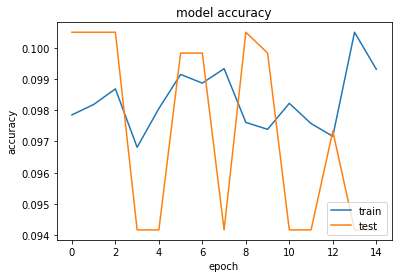

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='lower right')
plt.show()

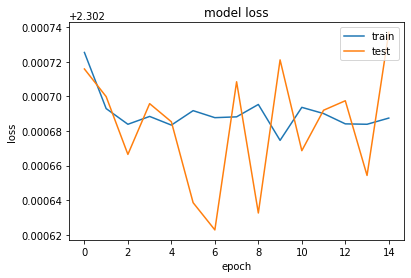

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper right')
plt.show()

In [ ]:
score = model.evaluate(testX, testY, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.302269220352173
Test accuracy: 0.15743260085582733


In [ ]:
loss, accuracy, precision, recall = model.evaluate(testX, testY, verbose=0)
print('Loss', loss)
print('Accuracy', accuracy)
print('Precision', precision)
print('Recall', recall)

#f1_score = (2* recall*precision)/(recall+precision)
#print("f1_score", f1_score)

Loss 2.302269220352173
Accuracy 0.15743260085582733
Precision 0.0
Recall 0.0


## ConvNet

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

In [ ]:
# Scale images to the [0, 1] range
trainX = np.array(trainX)
testX = np.array(testX)
trainX = trainX.astype("float32") / 255
testX = testX.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

print("x_train shape:", trainX.shape)
print(trainX.shape[0], "train samples")
print(testX.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1, 1, 1, 1)
60000 train samples
27561 test samples


In [ ]:
trainY = np.array(trainY)
testY = np.array(testY)

In [ ]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy",keras.metrics.Precision(),keras.metrics.Recall()])

history = model.fit(trainX, trainY, batch_size=batch_size, epochs=epochs, validation_split=0.1)

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'precision_3', 'recall_3', 'val_loss', 'val_accuracy', 'val_precision_3', 'val_recall_3'])


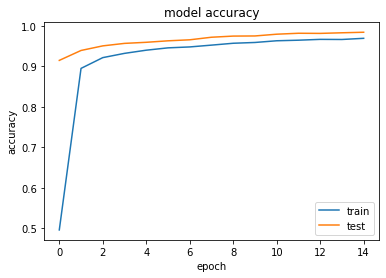

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='lower right')
plt.show()

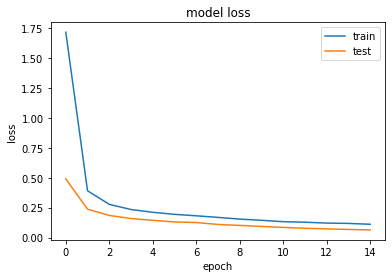

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'],loc='upper right')
plt.show()

In [ ]:
score = model.evaluate(testX, testY, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0745575949549675
Test accuracy: 0.9818947315216064


In [ ]:
loss, accuracy, precision, recall = model.evaluate(testX, testY, verbose=0)
print('Loss', loss)
print('Accuracy', accuracy)
print('Precision', precision)
print('Recall', recall)

f1_score = (2* recall*precision)/(recall+precision)
print("f1_score", f1_score)

Loss 0.0745575949549675
Accuracy 0.9818947315216064
Precision 0.9839749336242676
Recall 0.9802619814872742
f1_score 0.9821149483014988


In [ ]:
from keras.models import load_model

model.save('cnn.h5')  # creates a HDF5 file 'my_model.h5'